## 1. Data pre-processing and feature selection

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor  


In [201]:
df = pd.read_csv("data.csv")

In [202]:
#Drop Unnamed: 32 and ID columns
df = df.drop(["Unnamed: 32", "id"], axis=1)

In [203]:
## No nulls 
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [204]:
## Replace M and B with 1 and 0 
df = df.replace("M",1)
df = df.replace("B",0)
df = (df.apply(lambda x : (x - np.mean(x)) / np.std(x)))

#### Multicollinearity occurs when independent variables in a regression model are correlated. Using Variance Inflation Factor- VIF- we can determine if two independent variables are collinear with each other. When measuring, if the two features have a VIF of 1, then they are not collinear of each other (ie there are no correlation between these two features). However, as the numbers increases, the higher they are correlated with each other. If VIF returns a number greater than 5, then those two features should be reduced to one using PCA.
  

In [171]:
def calculate_vif(X, thresh=5):
        X = X.drop(["diagnosis"], axis=1)
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            # 
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [172]:
# variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables.
df3 = calculate_vif(df2)
df3.columns

Dropping radius_mean with vif=3806.1152963979675
Dropping radius_worst with vif=616.3508614719424
Dropping perimeter_mean with vif=325.64131198187516
Dropping perimeter_worst with vif=123.25781086343038
Dropping concavity_mean with vif=64.65479584770004
Dropping radius_se with vif=35.61751844352034
Dropping compactness_worst with vif=33.96063880508537
Dropping concave points_worst with vif=30.596655364834078
Dropping area_mean with vif=25.387829695531387
Dropping compactness_mean with vif=18.843208489973282
Dropping texture_worst with vif=17.232376192128665
Dropping area_se with vif=16.333806476471736
Dropping concavity_worst with vif=15.510661467365725
Dropping concave points_mean with vif=8.984359709155799
Dropping fractal_dimension_worst with vif=8.390012851546278
Dropping smoothness_worst with vif=7.507052167419571
Dropping compactness_se with vif=5.134581811858041


Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'perimeter_se', 'smoothness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'area_worst', 'symmetry_worst'],
      dtype='object')

In [200]:
# For each X, calculate VIF and save in dataframe
#vif = pd.DataFrame()
#df4 = (df.apply(lambda x : (x - np.mean(x))))
#vif["VIF Factor"] = [variance_inflation_factor(df4.values, i) for i in range(df4.shape[1])]
#vif["features"] = df.columns


In [67]:
# See if data is skewed --> 37% --> https://elitedatascience.com/imbalanced-classes
# Multicollinearity - VIF --> features --> PCA
# Normalize
print(df.diagnosis.value_counts())

#Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to 
#learn signals from both classes e.g. Random Forest, Gradient Booste Trees --> check on unseen data if they overfit 
#Boxplots/bar charts for B and M and all variables 

0    357
1    212
Name: diagnosis, dtype: int64


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### PCA

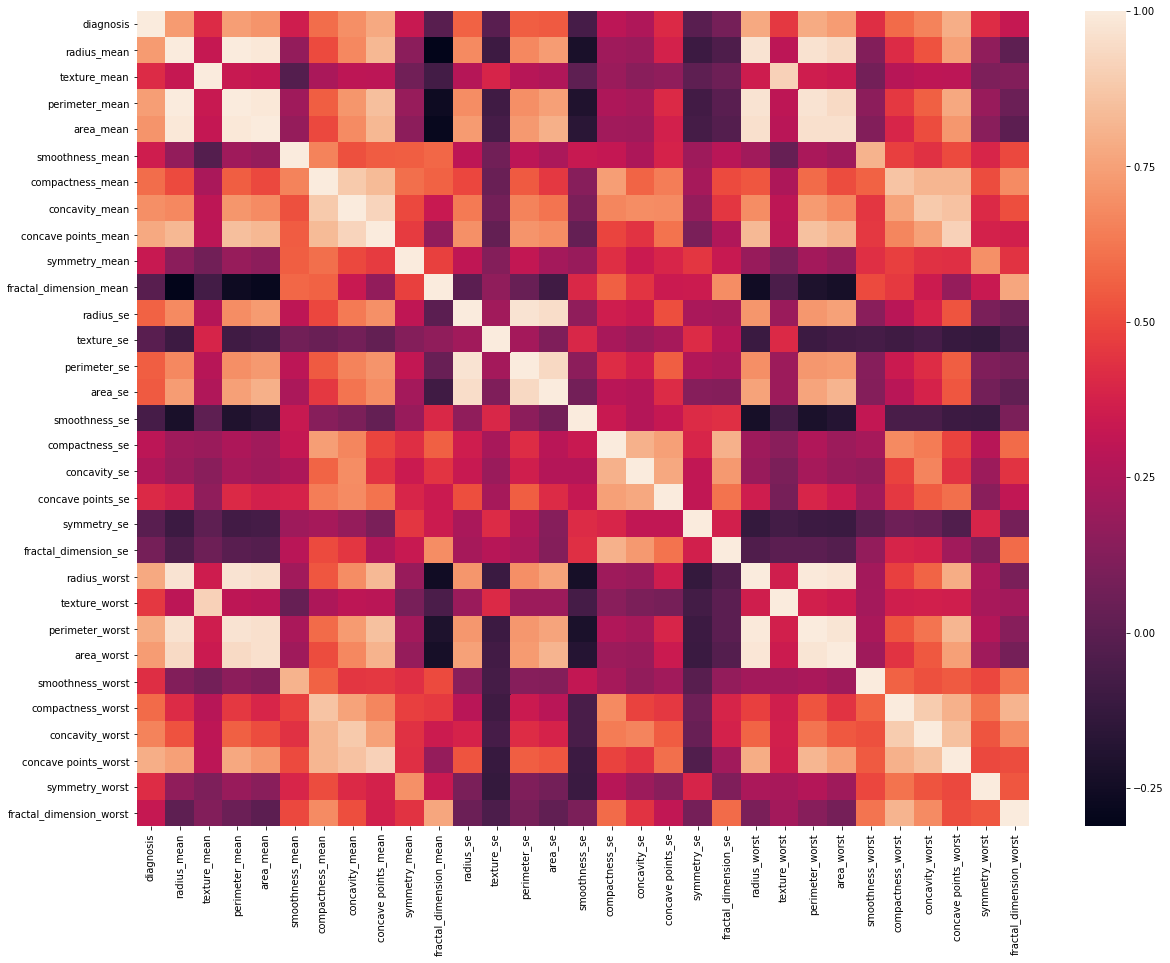

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,15))
correlation_matrix = df.corr()
sns.heatmap(data = correlation_matrix, annot = False)

In [231]:
from sklearn.decomposition import PCA
df2 = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]

pca = PCA(n_components=30)
pca.fit(df2.values)
df_pca = pca.transform(df2)

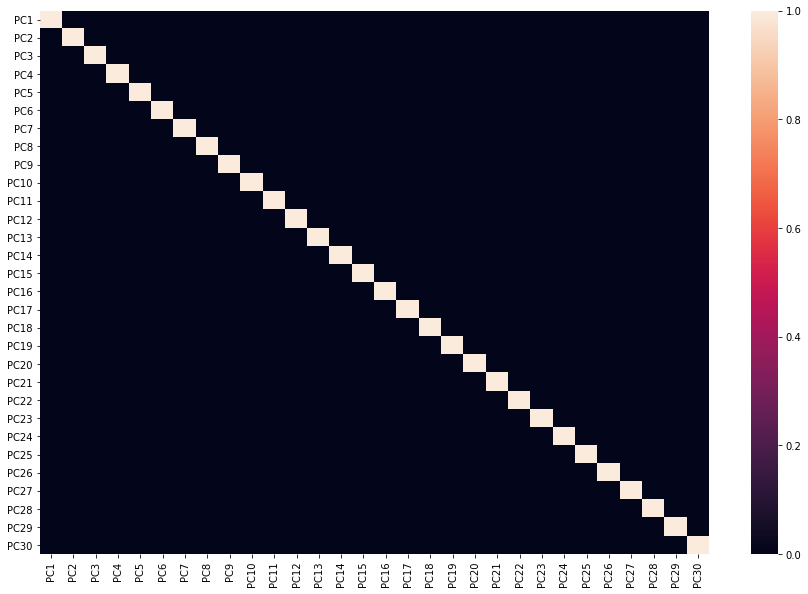

In [230]:
features_pca = ['PC'+str(i+1) for i in range(pca.n_components)]
Z = pd.DataFrame(df_pca , columns=features_pca)

plt.figure(figsize = (15,10))
sns.heatmap(Z.corr(), annot=False)

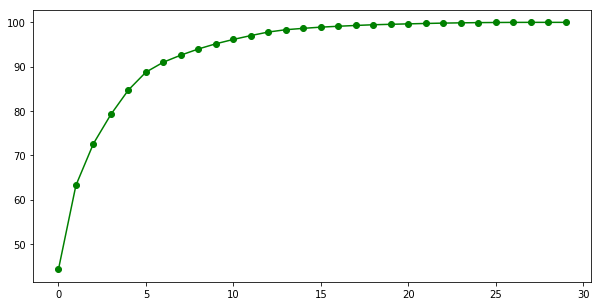

In [219]:
#Cumulative Variance explains
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.figure(figsize = (10,5))
plt.plot(var1, 'go-')

In [226]:
#Looking at above plot I'm taking 14 variables
X = df.values
pca = PCA(n_components=14)
pca.fit(X)
array_pca=pca.fit_transform(X)

print (df_pca.shape)

(569, 14)


In [233]:
X=pd.DataFrame(array_pca) 

In [246]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

### 2. Random Forest

In [257]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### Performance Evaluation

In [261]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#check with all componenets 

[[106   2]
 [  3  60]]
0.9707602339181286


In [264]:
from sklearn.metrics import roc_auc_score
# Predict class probabilities
prob_y_2 = classifier.predict_proba(X)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [265]:
print(roc_auc_score(y_encoded, prob_y_2))

0.9977141800116274


#### Hyper-parameters tuning